## Data Dimensionality

Nr. Records =  286
First timestamp 2015-01-05 00:00:00
Last timestamp 2020-09-07 00:00:00


(array([735234., 735599., 735964., 736330., 736695., 737060., 737425.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

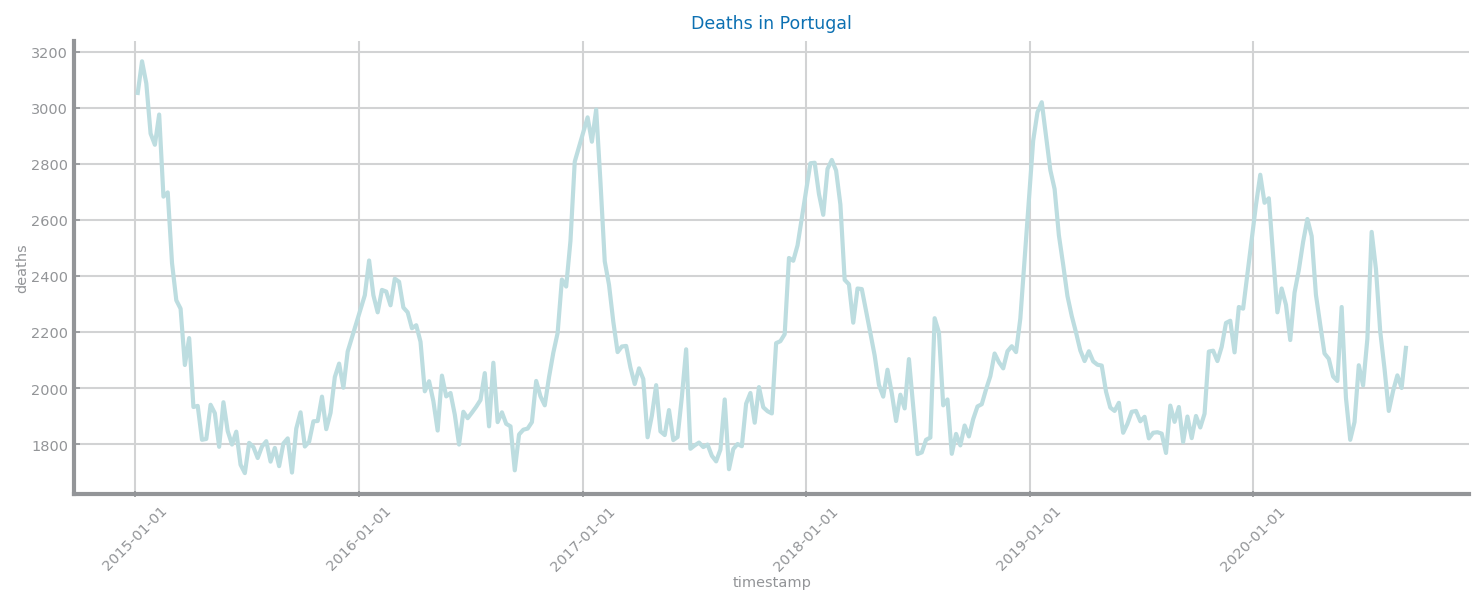

In [1]:
import sys
sys.path.insert(1, '../utils')

import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
import ts_functions as ts
import scipy.stats as _stats
import numpy as np

data = pd.read_csv('deaths_pt.csv', index_col='start_date', sep=',', decimal='.',
                   parse_dates=True, infer_datetime_format=True)
data = data.sort_values('start_date')

print("Nr. Records = ", data.shape[0])
print("First timestamp", data.index[0])
print("Last timestamp", data.index[-1])
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))


def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = _stats.norm.fit(x_values)
    distributions['Normal(%.4f,%.4f)'%(mean,sigma)] = _stats.norm.pdf(x_values, mean, sigma)
    # Exponential
    loc, scale = _stats.expon.fit(x_values)
    distributions['Exp(%.4f)'%(1/scale)] = _stats.expon.pdf(x_values, loc, scale)
    # Uniform
    loc_u, scale_u = _stats.uniform.fit(x_values)
    distributions['Uni(%.4f)'%(1/scale_u)] = _stats.uniform.pdf(x_values, loc_u, scale_u)
    return distributions

#values = data.sort_values('start_date').values
#distributions = compute_known_distributions(values)
#ds.multiple_line_chart(list(data.index), distributions, title='Best fit for deaths', xlabel="date", ylabel="deaths")

ts.plot_series(data, x_label='timestamp', y_label='deaths', title='Deaths in Portugal')
plt.xticks(rotation = 45)

#plt.show()

In [2]:
data

,deaths
start_date,
2015-01-05,3054
2015-01-12,3167
2015-01-19,3088
2015-01-26,2909
2015-02-02,2869
...,...
2020-08-10,1919
2020-08-17,1990
2020-08-24,2046


## Data Granularity

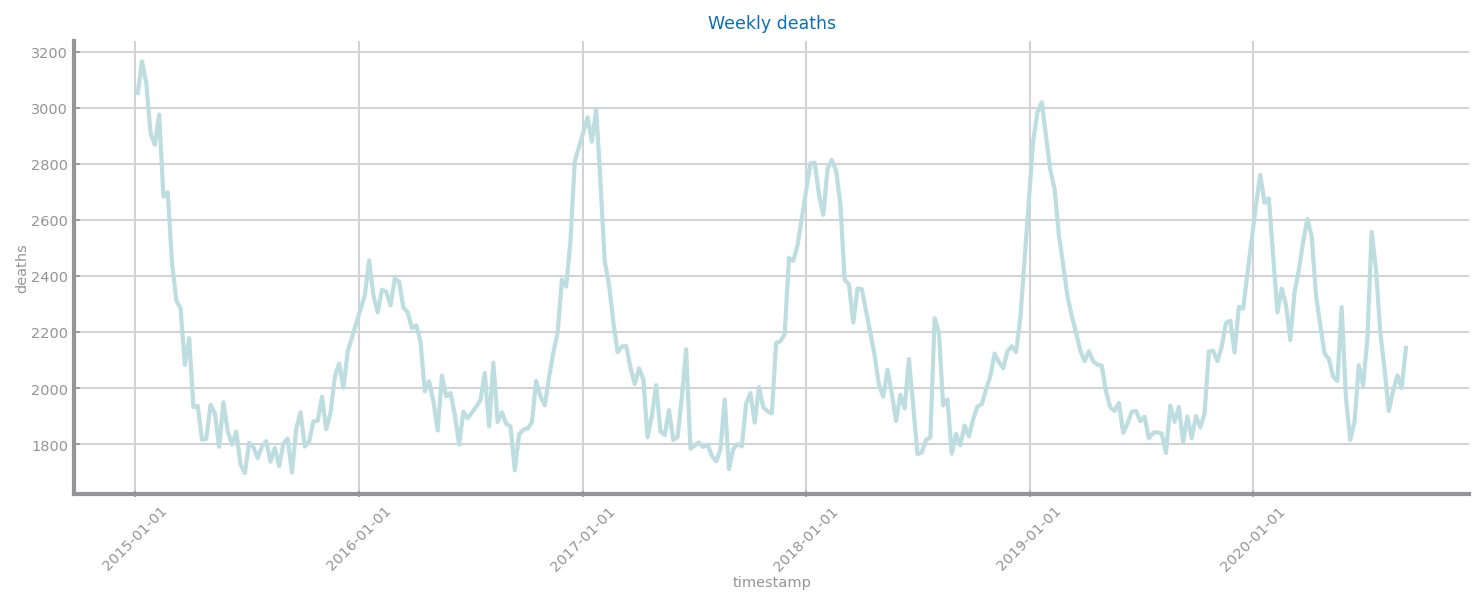

In [3]:
week_df = data.copy().groupby(data.index.date).mean()
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(week_df, title='Weekly deaths', x_label='timestamp', y_label='deaths')
plt.xticks(rotation = 45)
plt.show()

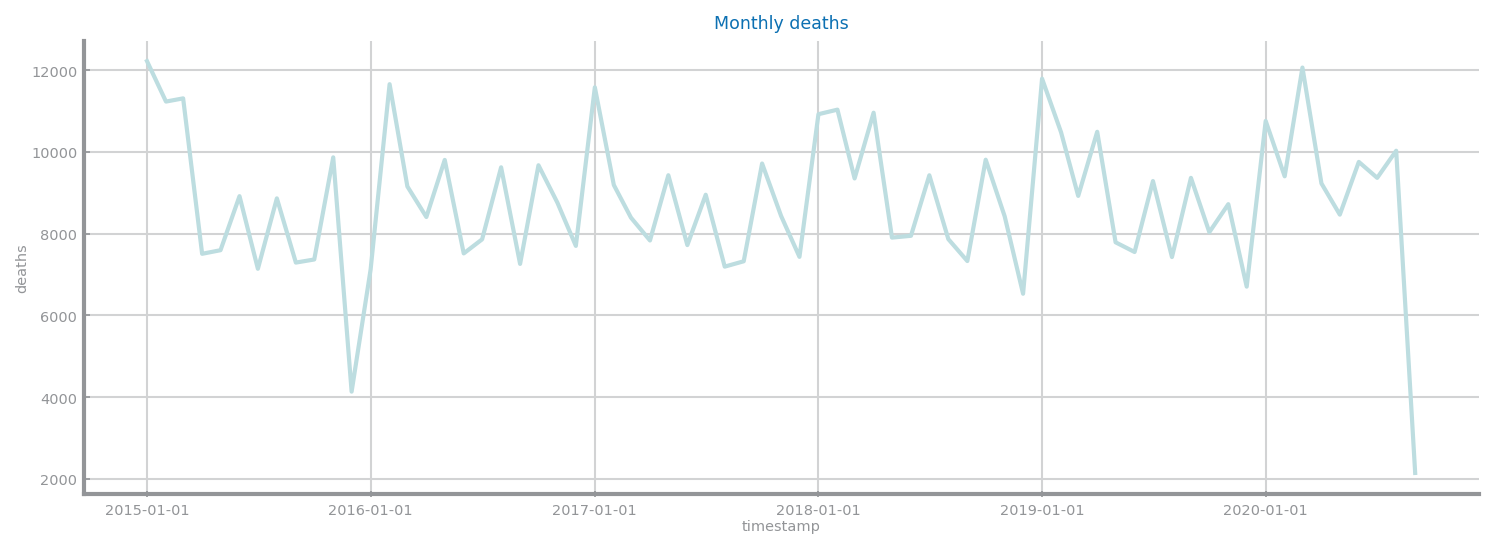

In [4]:
index = data.index.to_period('M')
month_df = data.copy().groupby(index).sum()
month_df['start_date'] = index.drop_duplicates().to_timestamp()
month_df.set_index('start_date', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(month_df, title='Monthly deaths', x_label='timestamp', y_label='deaths')
plt.show()

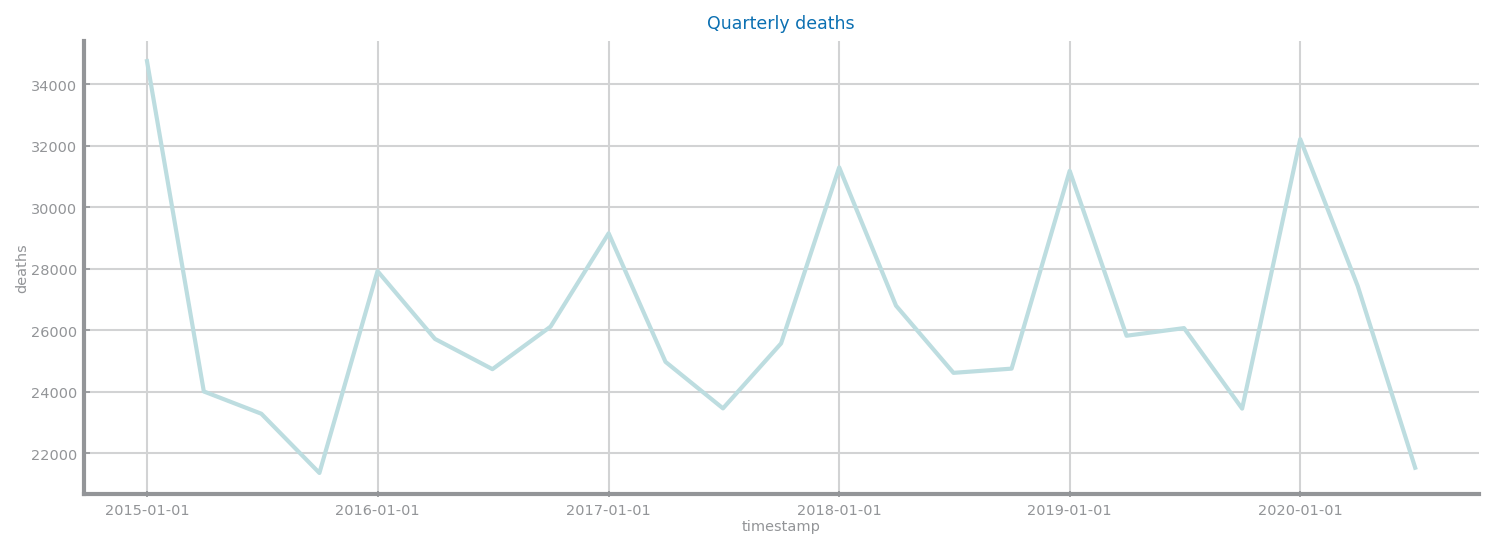

In [5]:
index = data.index.to_period('Q')
quarter_df = data.copy().groupby(index).sum()
quarter_df['start_date'] = index.drop_duplicates().to_timestamp()
quarter_df.set_index('start_date', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(quarter_df, title='Quarterly deaths', x_label='timestamp', y_label='deaths')
plt.show()

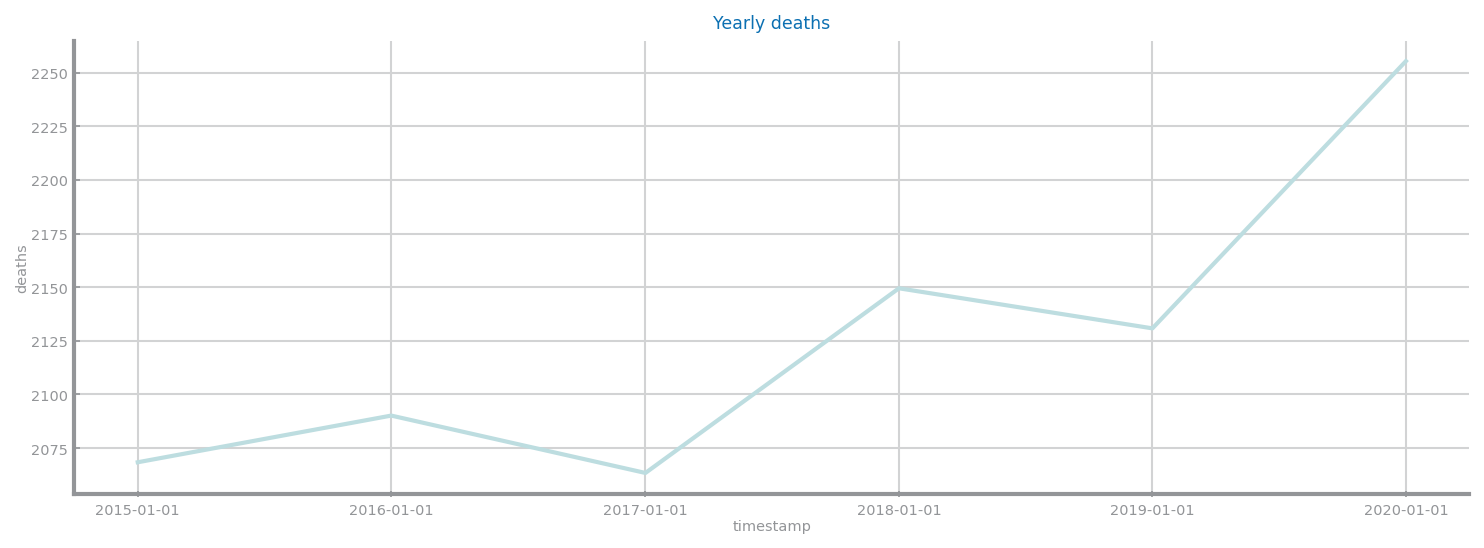

In [6]:
index = data.index.to_period('Y')
quarter_df = data.copy().groupby(index).mean()
quarter_df['start_date'] = index.drop_duplicates().to_timestamp()
quarter_df.set_index('start_date', drop=True, inplace=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(quarter_df, title='Yearly deaths', x_label='timestamp', y_label='deaths')
plt.show()

## Data Distribution

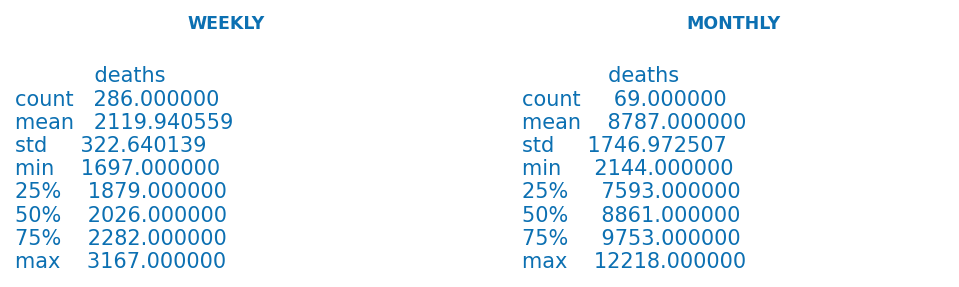

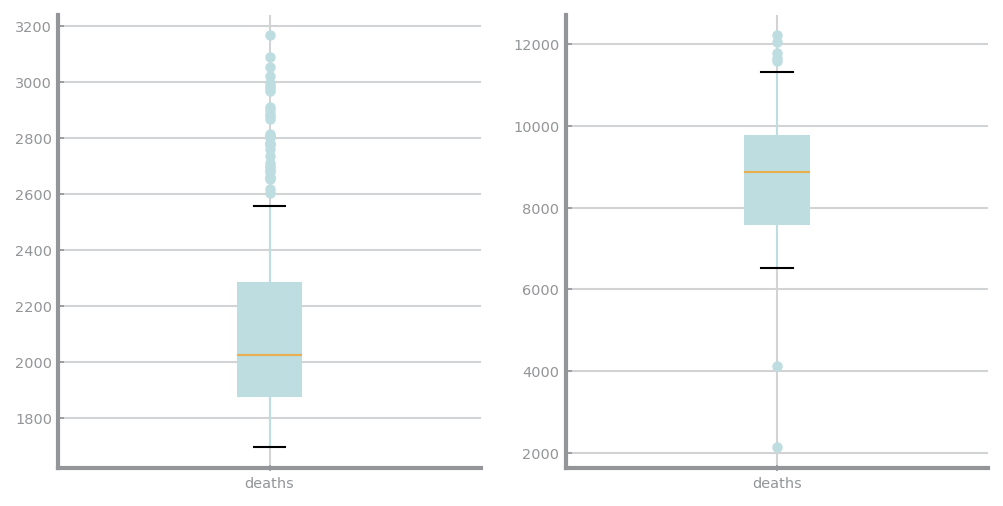

In [7]:
index = data.index.to_period('M')
month_df = data.copy().groupby(index).sum()
month_df['start_date'] = index.drop_duplicates().to_timestamp()
month_df.set_index('start_date', drop=True, inplace=True)
_, axs = plt.subplots(1, 2, figsize=(2*ts.HEIGHT, ts.HEIGHT/2))
axs[0].grid(False)
axs[0].set_axis_off()
axs[0].set_title('WEEKLY', fontweight="bold")
axs[0].text(0, 0, str(data.describe()))
axs[1].grid(False)
axs[1].set_axis_off()
axs[1].set_title('MONTHLY', fontweight="bold")
axs[1].text(0, 0, str(month_df.describe()))
plt.show()

_, axs = plt.subplots(1, 2, figsize=(2*ts.HEIGHT, ts.HEIGHT))
data.boxplot(ax=axs[0])
month_df.boxplot(ax=axs[1])
plt.show()

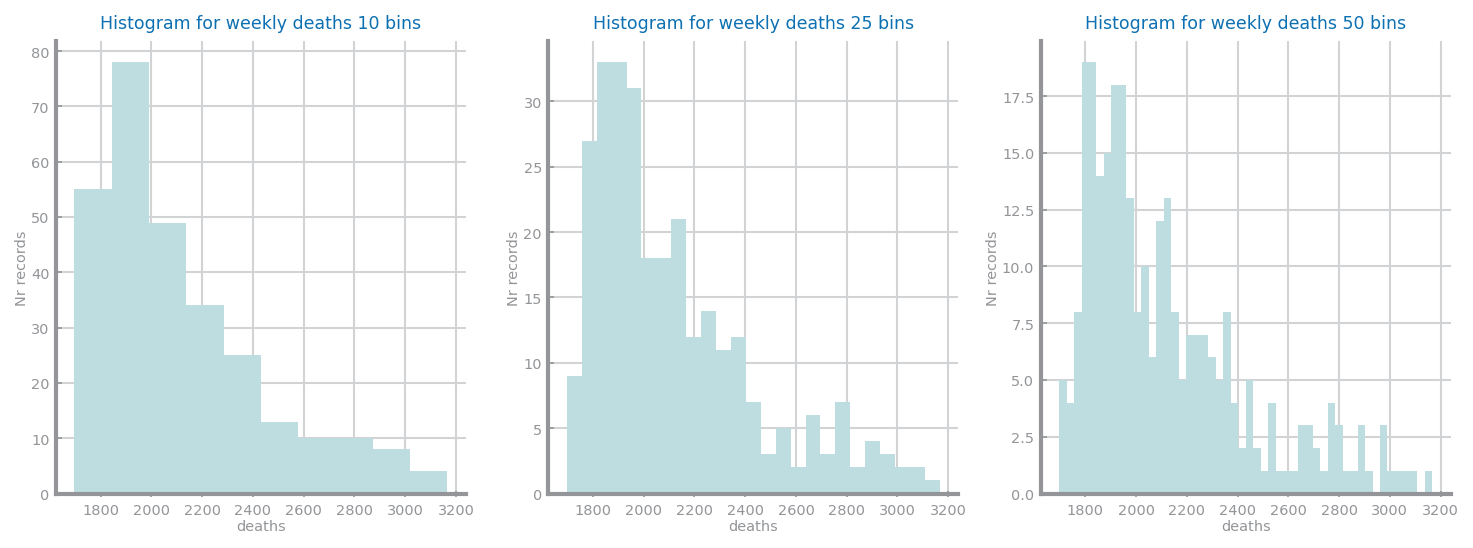

In [8]:
bins = (10, 25, 50)
_, axs = plt.subplots(1, len(bins), figsize=(len(bins)*ts.HEIGHT, ts.HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for weekly deaths %d bins'%bins[j])
    axs[j].set_xlabel('deaths')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(data.values, bins=bins[j])
plt.show()

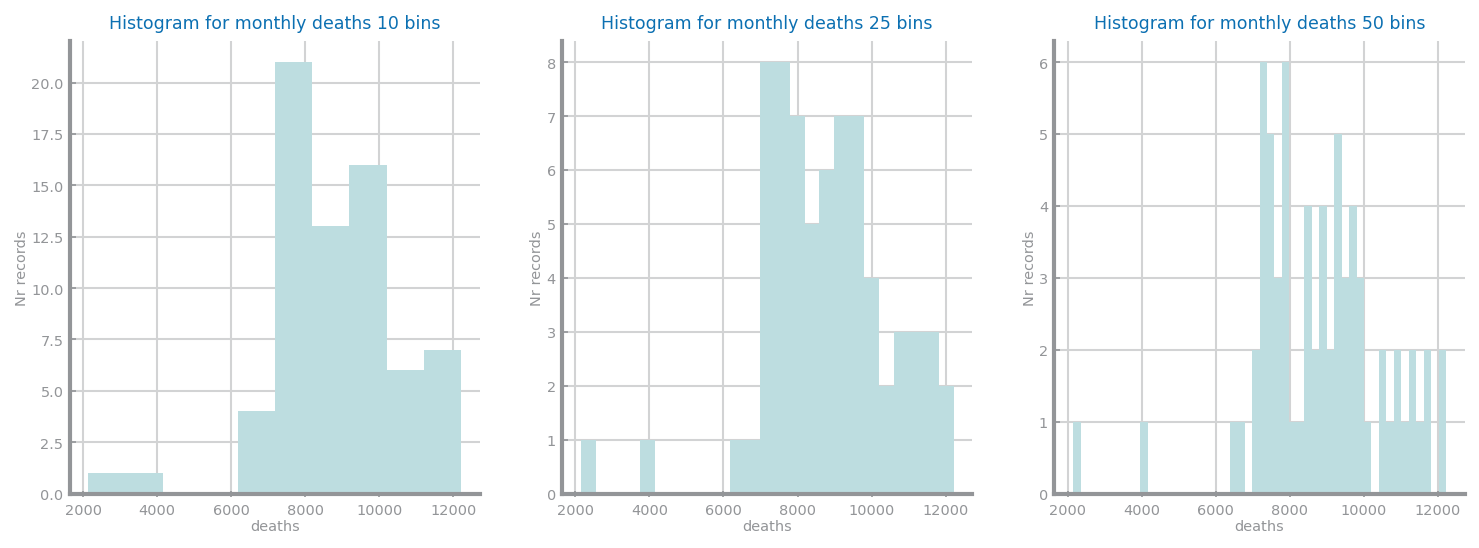

In [16]:
_, axs = plt.subplots(1, len(bins), figsize=(len(bins)*ts.HEIGHT, ts.HEIGHT))
for j in range(len(bins)):
    axs[j].set_title('Histogram for monthly deaths %d bins'%bins[j])
    axs[j].set_xlabel('deaths')
    axs[j].set_ylabel('Nr records')
    axs[j].hist(month_df.values, bins=bins[j])
plt.show()

## Data Stationarity


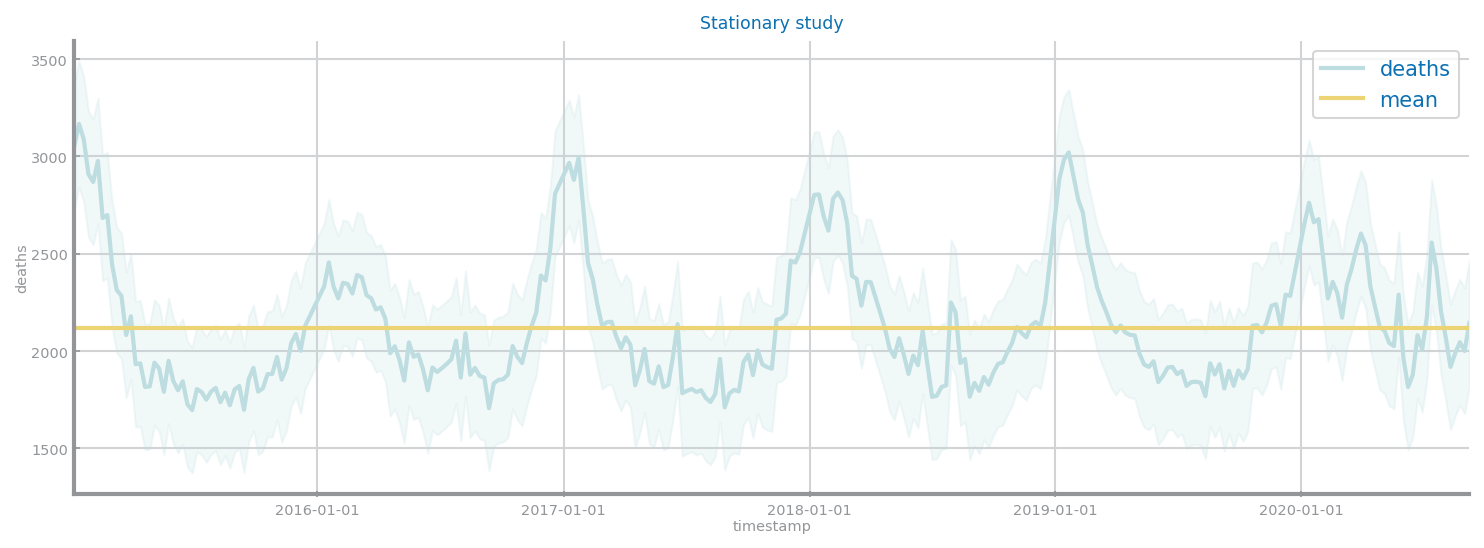

In [10]:
import numpy as np
dt_series = pd.Series(data['deaths'])

mean_line = pd.Series(np.ones(len(dt_series.values)) * dt_series.mean(), index=dt_series.index)
series = {'deaths': dt_series, 'mean': mean_line}
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(series, x_label='timestamp', y_label='deaths', title='Stationary study', show_std=True)
plt.show()

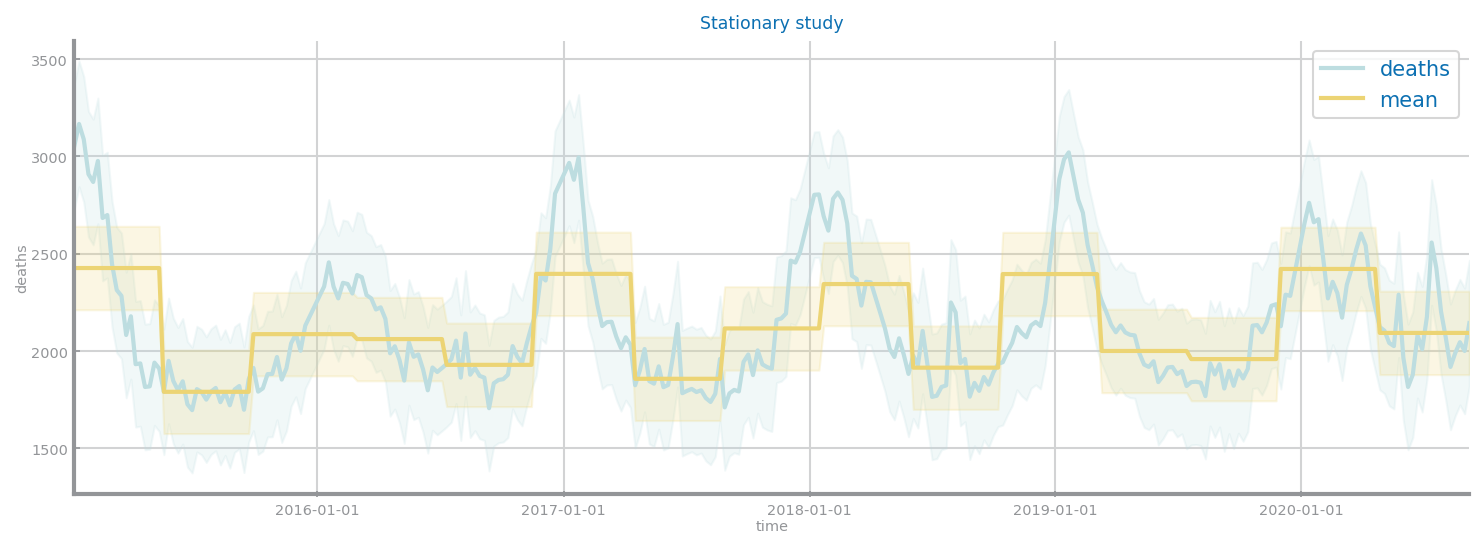

In [11]:
BINS = 15
line = []
n = len(dt_series)
for i in range(BINS):
    start = int(i*n/BINS)
    end = int((i+1)*n/BINS)
    b = dt_series[start:end]
    mean = [b.mean()] * (end - start)
    line += mean

line += [line[-1]] * (n - len(line))
mean_line = pd.Series(line, index=dt_series.index)
series = {'deaths': dt_series, 'mean': mean_line}
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(series, x_label='time', y_label='deaths', title='Stationary study', show_std=True)
plt.show()

## Time series transformation

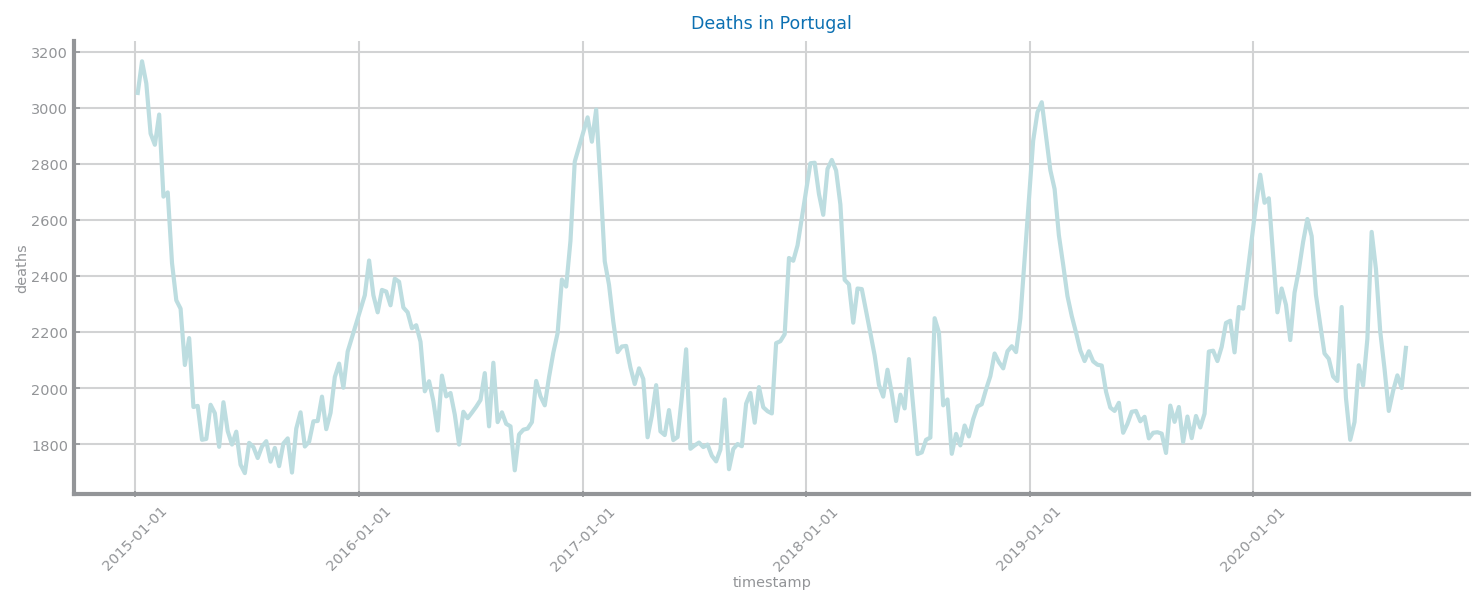

In [12]:
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(data, x_label='timestamp', y_label='deaths', title='Deaths in Portugal')
plt.xticks(rotation = 45)
plt.show()

### Smoothing

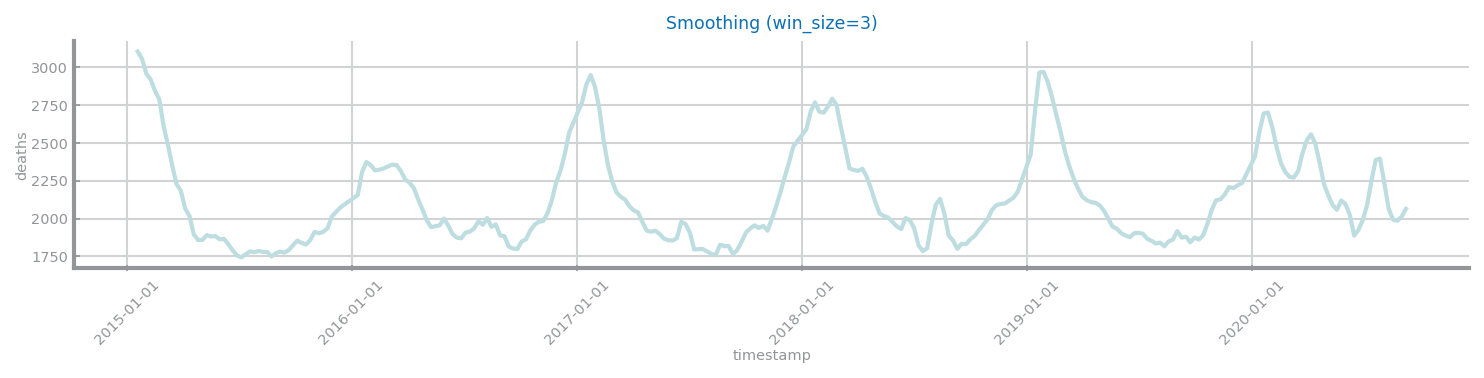

In [13]:
WIN_SIZE = 3
rolling = data.rolling(window=WIN_SIZE)
smooth_df = rolling.mean()
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT/2))
ts.plot_series(smooth_df, title=f'Smoothing (win_size={WIN_SIZE})', x_label='timestamp', y_label='deaths')
plt.xticks(rotation = 45)
plt.show()

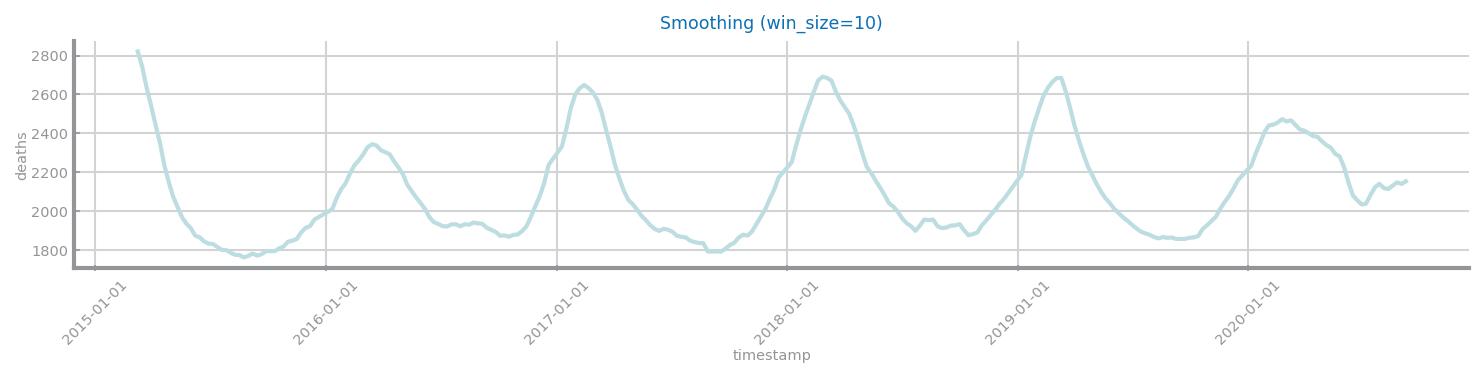

In [14]:
WIN_SIZE = 10
rolling = data.rolling(window=WIN_SIZE)
smooth_df = rolling.mean()
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT/2))
ts.plot_series(smooth_df, title=f'Smoothing (win_size={WIN_SIZE})', x_label='timestamp', y_label='deaths')
plt.xticks(rotation = 45)
plt.show()

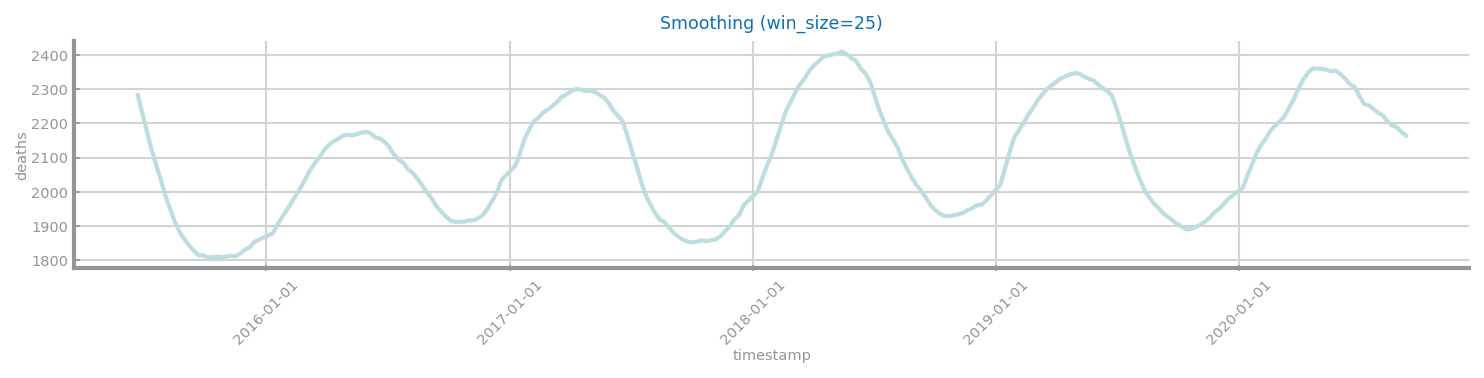

In [15]:
WIN_SIZE = 25
rolling = data.rolling(window=WIN_SIZE)
smooth_df = rolling.mean()
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT/2))
ts.plot_series(smooth_df, title=f'Smoothing (win_size={WIN_SIZE})', x_label='timestamp', y_label='deaths')
plt.xticks(rotation = 45)
plt.show()